In [1]:
import twint
import pandas as pd
import numpy as np
import nest_asyncio
nest_asyncio.apply()

In [2]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
get_ipython().run_line_magic("matplotlib", "inline")

In [3]:
list = ["inflation_guy", "cnbc", "dylanmatt", "bloomberg", "wsj"]
for tweets in list:
    print(list)
    c = twint.Config()
    c.Search = "inflation"
    c.Hide_output = True
    c.Lang= "en"
    c.Pandas = True
    c.Since = "2016-01-01"
    c.near = "united_states"
    c.Limit = 1000
    twint.run.Search(c)
Tweets_df = twint.output.panda.Tweets_df
Tweets_df.head()

['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1442649159211753472,1442542410949488648,1.632789e+12,2021-09-27 20:35:37,-0400,,@ecb @EP_Economics Sorry but this is simply de...,en,[ecb],[],...,,,,,,"[{'screen_name': 'ecb', 'name': 'European Cent...",,,,
1,1442649112596267009,1442649112596267009,1.632789e+12,2021-09-27 20:35:26,-0400,,Good morning Asia! ☕️First up with key news/ev...,en,[],[],...,,,,,,[],,,,
2,1442649026734829571,1442523927536885762,1.632789e+12,2021-09-27 20:35:05,-0400,,@Claudia_Sahm Supply side inflation is not C...,en,[],[],...,,,,,,"[{'screen_name': 'Claudia_Sahm', 'name': 'Clau...",,,,
3,1442648992664457216,1440742570787631106,1.632789e+12,2021-09-27 20:34:57,-0400,,"@Harpua71 @eddiek005 @LeaderMcConnell Um, the ...",en,[],[],...,,,,,,"[{'screen_name': 'Harpua71', 'name': 'Harpua',...",,,,
4,1442648983424405504,1442648983424405504,1.632789e+12,2021-09-27 20:34:55,-0400,,A lot going on. Tons of new links up at https...,en,"[inflation, vaccines, boosters, china, liberty]",[],...,,,,,,[],,,,


In [4]:
Tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1442649159211753472,1442542410949488648,1.632789e+12,2021-09-27 20:35:37,-0400,,@ecb @EP_Economics Sorry but this is simply de...,en,[ecb],[],...,,,,,,"[{'screen_name': 'ecb', 'name': 'European Cent...",,,,
1,1442649112596267009,1442649112596267009,1.632789e+12,2021-09-27 20:35:26,-0400,,Good morning Asia! ☕️First up with key news/ev...,en,[],[],...,,,,,,[],,,,
2,1442649026734829571,1442523927536885762,1.632789e+12,2021-09-27 20:35:05,-0400,,@Claudia_Sahm Supply side inflation is not C...,en,[],[],...,,,,,,"[{'screen_name': 'Claudia_Sahm', 'name': 'Clau...",,,,
3,1442648992664457216,1440742570787631106,1.632789e+12,2021-09-27 20:34:57,-0400,,"@Harpua71 @eddiek005 @LeaderMcConnell Um, the ...",en,[],[],...,,,,,,"[{'screen_name': 'Harpua71', 'name': 'Harpua',...",,,,
4,1442648983424405504,1442648983424405504,1.632789e+12,2021-09-27 20:34:55,-0400,,A lot going on. Tons of new links up at https...,en,"[inflation, vaccines, boosters, china, liberty]",[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1442614067055800322,1442614067055800322,1.632781e+12,2021-09-27 18:16:10,-0400,,I doubt the main question for the next few yea...,en,[],[],...,,,,,,[],,,,
1002,1442614029881597953,1442614029881597953,1.632781e+12,2021-09-27 18:16:01,-0400,,Consumer prices for furniture and bedding saw ...,en,"[inflation, homefurnishings]",[],...,,,,,,[],,,,
1003,1442614028505919488,1442284014363189248,1.632781e+12,2021-09-27 18:16:01,-0400,,@POTUS Hey stupid. Inflation is a tax. Gas is ...,en,[],[],...,,,,,,"[{'screen_name': 'POTUS', 'name': 'President B...",,,,
1004,1442614014622765060,1442606221953933319,1.632781e+12,2021-09-27 18:15:58,-0400,,@RepJeffDuncan @POTUS You posted this earlier ...,en,[],[],...,,,,,,"[{'screen_name': 'RepJeffDuncan', 'name': 'Rep...",,,,


In [5]:
Tweets_df = twint.storage.panda.Tweets_df

In [6]:
Tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1442649159211753472,1442542410949488648,1.632789e+12,2021-09-27 20:35:37,-0400,,@ecb @EP_Economics Sorry but this is simply de...,en,[ecb],[],...,,,,,,"[{'screen_name': 'ecb', 'name': 'European Cent...",,,,
1,1442649112596267009,1442649112596267009,1.632789e+12,2021-09-27 20:35:26,-0400,,Good morning Asia! ☕️First up with key news/ev...,en,[],[],...,,,,,,[],,,,
2,1442649026734829571,1442523927536885762,1.632789e+12,2021-09-27 20:35:05,-0400,,@Claudia_Sahm Supply side inflation is not C...,en,[],[],...,,,,,,"[{'screen_name': 'Claudia_Sahm', 'name': 'Clau...",,,,
3,1442648992664457216,1440742570787631106,1.632789e+12,2021-09-27 20:34:57,-0400,,"@Harpua71 @eddiek005 @LeaderMcConnell Um, the ...",en,[],[],...,,,,,,"[{'screen_name': 'Harpua71', 'name': 'Harpua',...",,,,
4,1442648983424405504,1442648983424405504,1.632789e+12,2021-09-27 20:34:55,-0400,,A lot going on. Tons of new links up at https...,en,"[inflation, vaccines, boosters, china, liberty]",[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1442614067055800322,1442614067055800322,1.632781e+12,2021-09-27 18:16:10,-0400,,I doubt the main question for the next few yea...,en,[],[],...,,,,,,[],,,,
1002,1442614029881597953,1442614029881597953,1.632781e+12,2021-09-27 18:16:01,-0400,,Consumer prices for furniture and bedding saw ...,en,"[inflation, homefurnishings]",[],...,,,,,,[],,,,
1003,1442614028505919488,1442284014363189248,1.632781e+12,2021-09-27 18:16:01,-0400,,@POTUS Hey stupid. Inflation is a tax. Gas is ...,en,[],[],...,,,,,,"[{'screen_name': 'POTUS', 'name': 'President B...",,,,
1004,1442614014622765060,1442606221953933319,1.632781e+12,2021-09-27 18:15:58,-0400,,@RepJeffDuncan @POTUS You posted this earlier ...,en,[],[],...,,,,,,"[{'screen_name': 'RepJeffDuncan', 'name': 'Rep...",,,,


In [7]:
Tweets_df['hashtags']

0                                                 [ecb]
1                                                    []
2                                                    []
3                                                    []
4       [inflation, vaccines, boosters, china, liberty]
                             ...                       
1001                                                 []
1002                       [inflation, homefurnishings]
1003                                                 []
1004                                                 []
1005                                                 []
Name: hashtags, Length: 1006, dtype: object

In [8]:
Tweets_df.drop(['id', 'conversation_id', 'created_at', 'timezone', 'place', 'language','cashtags', 'user_id', 'user_id_str','username', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis = 1, inplace = True)

In [9]:
Tweets_df

,date,tweet,hashtags,name,nlikes,nreplies,nretweets
0,2021-09-27 20:35:37,@ecb @EP_Economics Sorry but this is simply de...,[ecb],Clive,0,0,0
1,2021-09-27 20:35:26,Good morning Asia! ☕️First up with key news/ev...,[],"Kelvin Wong, CFTe",0,0,0
2,2021-09-27 20:35:05,@Claudia_Sahm Supply side inflation is not C...,[],Owen Paine,0,0,0
3,2021-09-27 20:34:57,"@Harpua71 @eddiek005 @LeaderMcConnell Um, the ...",[],Dysheki,0,0,0
4,2021-09-27 20:34:55,A lot going on. Tons of new links up at https...,"[inflation, vaccines, boosters, china, liberty]",Republic of Truth,0,0,0
...,...,...,...,...,...,...,...
1001,2021-09-27 18:16:10,I doubt the main question for the next few yea...,[],Wait Capital,3,1,2
1002,2021-09-27 18:16:01,Consumer prices for furniture and bedding saw ...,"[inflation, homefurnishings]",FactSet,0,1,0
1003,2021-09-27 18:16:01,@POTUS Hey stupid. Inflation is a tax. Gas is ...,[],Bat211resisting,0,0,0
1004,2021-09-27 18:15:58,@RepJeffDuncan @POTUS You posted this earlier ...,[],Sax BlueCheck,0,0,0


In [10]:
#Download Vader/Update the VADER Lexicon
nltk.download("vader_lexicon")

#Initiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\afuen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [12]:
# Sentiment scores dictionaries
tweet_sent = {
    "tweet_compound": [],
    "tweet_pos": [],
    "tweet_neu": [],
    "tweet_neg": [],
    "tweet_sent": [],

}

# Get sentiment for the text and the title
for index, row in Tweets_df.iterrows():
    try:
        # Sentiment scoring with VADER
        tweet_sentiment = analyzer.polarity_scores(row["tweet"])
        tweet_sent["tweet_compound"].append(tweet_sentiment["compound"])
        tweet_sent["tweet_pos"].append(tweet_sentiment["pos"])
        tweet_sent["tweet_neu"].append(tweet_sentiment["neu"])
        tweet_sent["tweet_neg"].append(tweet_sentiment["neg"])
        tweet_sent["tweet_sent"].append(get_sentiment(tweet_sentiment["compound"]))

    
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
tweet_sentiment_df = pd.DataFrame(tweet_sent)
tweet_sentiment_df.head()

,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
0,-0.1531,0.068,0.823,0.109,-1
1,-0.4199,0.105,0.753,0.142,-1
2,-0.6789,0.110,0.673,0.217,-1
3,0.3182,0.113,0.887,0.000,1
4,0.0000,0.000,1.000,0.000,0


In [13]:
def join_dataframes(df1,df2): 
    df1=df1.join(df2)
    return df1

In [14]:
Tweets_dataframe=join_dataframes(Tweets_df, tweet_sentiment_df)
Tweets_dataframe.columns

Index(['date', 'tweet', 'hashtags', 'name', 'nlikes', 'nreplies', 'nretweets',
       'tweet_compound', 'tweet_pos', 'tweet_neu', 'tweet_neg', 'tweet_sent'],
      dtype='object')

In [15]:
Tweets_dataframe.drop(['hashtags', 'name', 'nlikes', 'nreplies', 'nretweets'], axis = 1, inplace = True)

In [16]:
Tweets_dataframe.head()

,date,tweet,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
0,2021-09-27 20:35:37,@ecb @EP_Economics Sorry but this is simply de...,-0.1531,0.068,0.823,0.109,-1
1,2021-09-27 20:35:26,Good morning Asia! ☕️First up with key news/ev...,-0.4199,0.105,0.753,0.142,-1
2,2021-09-27 20:35:05,@Claudia_Sahm Supply side inflation is not C...,-0.6789,0.110,0.673,0.217,-1
3,2021-09-27 20:34:57,"@Harpua71 @eddiek005 @LeaderMcConnell Um, the ...",0.3182,0.113,0.887,0.000,1
4,2021-09-27 20:34:55,A lot going on. Tons of new links up at https...,0.0000,0.000,1.000,0.000,0


<AxesSubplot:title={'center':'Twint Iflation Tweets Sentiment Comparison'}>

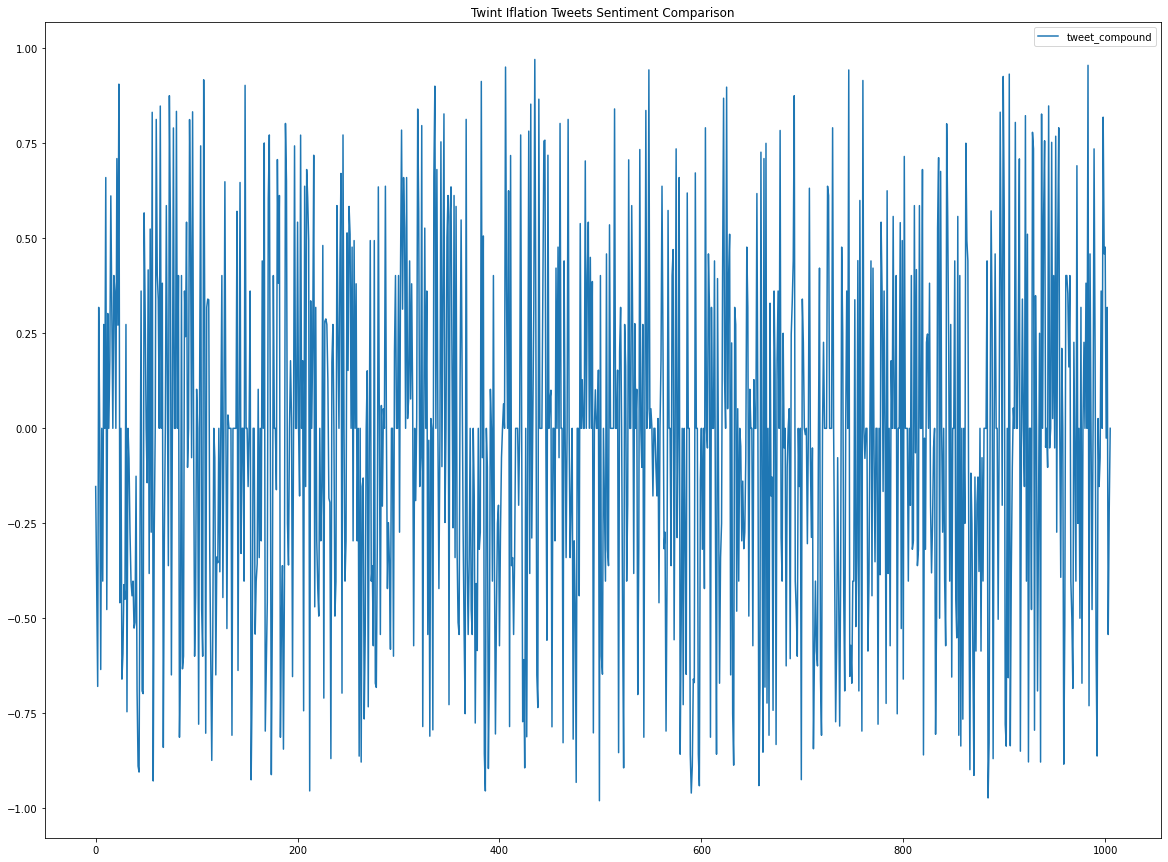

In [41]:
#Plot the dataframe - Information not plotanle
Tweets_dataframe.plot(
    y=["tweet_compound"],
    kind="line",
    title="Twint Iflation Tweets Sentiment Comparison",
    figsize=(20,15),
)

In [18]:
# Use the `heatmap` function from the seaborn library to visualize correlations
import seaborn as sns

In [19]:
inflation_correlation = Tweets_dataframe.corr()

<AxesSubplot:>

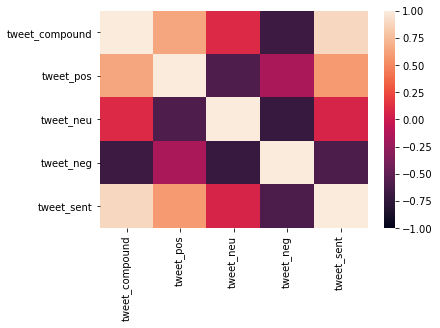

In [20]:
sns.heatmap(inflation_correlation, vmin=-1, vmax=1)

In [29]:
Tweets_dataframe.describe()

,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,-0.036411,0.075389,0.838969,0.085638,-0.078529
std,0.467167,0.090730,0.127015,0.103585,0.864327
min,-0.979600,0.000000,0.345000,0.000000,-1.000000
25%,-0.390200,0.000000,0.759250,0.000000,-1.000000
50%,0.000000,0.052500,0.848000,0.059000,0.000000
75%,0.318200,0.128750,0.939000,0.136000,1.000000
max,0.970300,0.487000,1.000000,0.655000,1.000000
